# Wine Quality Prediction Model

#### Dataset created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

## Dataset Information:


The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). They were combined, and a few values were randomly removed.

### Attribute Information

#### Attribute Information:
Input variables (based on physicochemical tests):
1. **fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. **volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. **residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 -gram/liter, and wines with greater than 45 grams/liter are considered sweet
5. **chlorides**: the amount of salt in the wine
6. **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. **total sulfur dioxide**: the amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. **density**: the density of wine is close to that of water depending on the percent alcohol and sugar content
9. **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. **sulphates**: a wine additive that can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
11. **alcohol**: the percent alcohol content of the wine
Output variable (based on sensory data):
12. **quality** (score between 0 and 10)

### Research Questions

### To understand and discover how can we predict wines’ quality by using machine learning, we list the research questions that we have here:
1. Is it possible to predict wine quality accurately with machine learning models? Which model works better? (Regression vs classification)
2. Which features explain the best for wine quality?
3. Can we use the same model to predict quality for red wine and white wine? Do features have the same impact on red wine quality as they have on white wine quality?

## Data cleaning explanation and preprocessing

### Import needed libraries for data exploration


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

### Raw Dataset Exploration


In [2]:
df = pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


 #### Check how many null values are present in the dataset


In [3]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### Check column data types 

In [4]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1168, 13)


### Data Cleaning

To facilitate our cleaning process, we define a function hich includes all the required steps explained below.<br><br>
To clean the dataset, we drop duplicate values, rename the columns and fill the null values with a mean value for the column. <br>We also convert categorical variable which is "type" into 2 dummy variables "type_red" and "type_white" and add a new column called “quality_cat” to categorize the quality of wine(0-4 low; 5-6 medium; 7-10 high)

In [6]:
def prepare_data(df):
    data=df.copy()
    data=data.drop_duplicates()
    data.columns=data.columns.str.replace(' ','_')
    na_columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar', 'chlorides','pH','sulphates']
    for i in na_columns:
        data[i].fillna(data[i].mean(),inplace=True)
    data = pd.get_dummies(data)
    data['quality_cat'] = pd.cut(data['quality'],bins=[0,4,6,10], labels=['low','medium','high'])
    data = data.reset_index(drop=True)
    return data

In [7]:
data = prepare_data(df)
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white,quality_cat
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0,1,medium
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0,1,medium
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0,1,medium
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1,medium
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6,0,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6,1,0,medium
5325,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1,0,medium
5326,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.533268,11.2,6,1,0,medium
5327,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1,0,medium


#### Now there are neither null values nor duplicate values in the dataset.

In [8]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_red                0
type_white              0
quality_cat             0
dtype: int64

In [9]:
data.duplicated().sum()

0

#### Check the updated data types and the shape of the dataset

In [10]:
data.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
type_red                   uint8
type_white                 uint8
quality_cat             category
dtype: object

In [11]:
data.shape

(5329, 15)

#### Some descriptive statistical values for our dataset

In [12]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,7.216573,0.344123,0.318738,5.053839,0.056668,30.060143,114.189341,0.994536,3.224434,0.533268,10.548539,5.796022,0.255020,0.744980
std,1.317955,0.168102,0.147075,4.503160,0.036838,17.815588,56.781422,0.002966,0.160140,0.149668,1.186134,0.879922,0.435913,0.435913
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000,0.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


### Understand the distribution of qualities. 
##### We observe that in this dataset, most of the wines have medium quality and only some of them have low quality.


In [13]:
data.quality.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

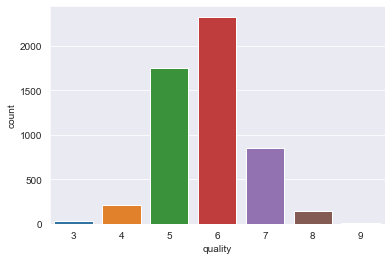

In [14]:
sns.set_style("darkgrid")
sns.countplot(x='quality',data=data)
plt.show()

#### The following plot illustrates the distribution of the different features.


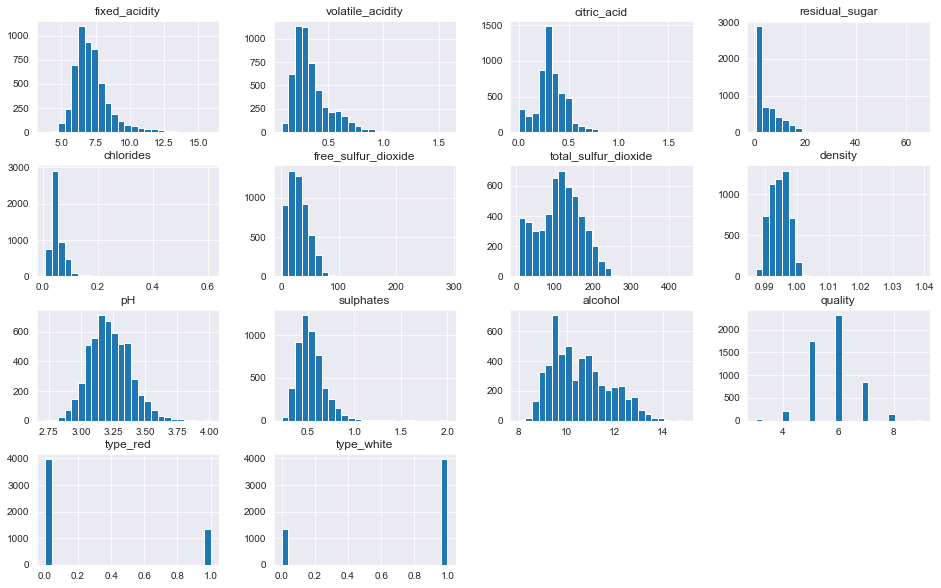

In [15]:
data.hist(bins=25,figsize=(16,10))
plt.show()

#### Here we can check the value counts of the created categories for wine quality.


In [16]:
data['quality_cat'].value_counts()

medium    4082
high      1011
low        236
Name: quality_cat, dtype: int64

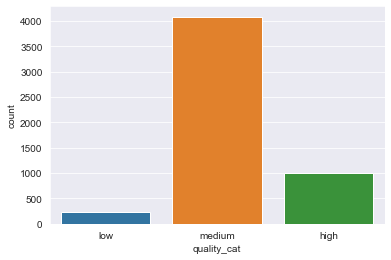

In [17]:
sns.countplot(x='quality_cat',data=data);

#### There are only 7 different scores in this dataset.

In [18]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

### Correlations between the variables
#### The correlation matrix demonstrates a linear relationship between variables.

In [19]:
corr_matrix = data.drop(["type_red", "type_white", "quality_cat"], axis=1).corr()
corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.215217,0.328758,-0.104633,0.289016,-0.281753,-0.327297,0.477858,-0.270185,0.305797,-0.102807,-0.080554
volatile_acidity,0.215217,1.000000,-0.383003,-0.164411,0.367303,-0.349389,-0.401260,0.307103,0.245531,0.226127,-0.065076,-0.264203
citric_acid,0.328758,-0.383003,1.000000,0.146622,0.055086,0.132186,0.195116,0.094893,-0.343141,0.060295,-0.005592,0.098764
residual_sugar,-0.104633,-0.164411,0.146622,1.000000,-0.123239,0.399310,0.487652,0.521632,-0.233840,-0.174803,-0.306392,-0.057279
chlorides,0.289016,0.367303,0.055086,-0.123239,1.000000,-0.186836,-0.269992,0.371440,0.026162,0.404377,-0.269104,-0.202318
free_sulfur_dioxide,-0.281753,-0.349389,0.132186,0.399310,-0.186836,1.000000,0.720666,0.006687,-0.141345,-0.198378,-0.170396,0.054456
total_sulfur_dioxide,-0.327297,-0.401260,0.195116,0.487652,-0.269992,0.720666,1.000000,0.007359,-0.222522,-0.274683,-0.249597,-0.050387
density,0.477858,0.307103,0.094893,0.521632,0.371440,0.006687,0.007359,1.000000,0.034134,0.282267,-0.668216,-0.326978
pH,-0.270185,0.245531,-0.343141,-0.233840,0.026162,-0.141345,-0.222522,0.034134,1.000000,0.166517,0.097343,0.039953
sulphates,0.305797,0.226127,0.060295,-0.174803,0.404377,-0.198378,-0.274683,0.282267,0.166517,1.000000,-0.017901,0.041390


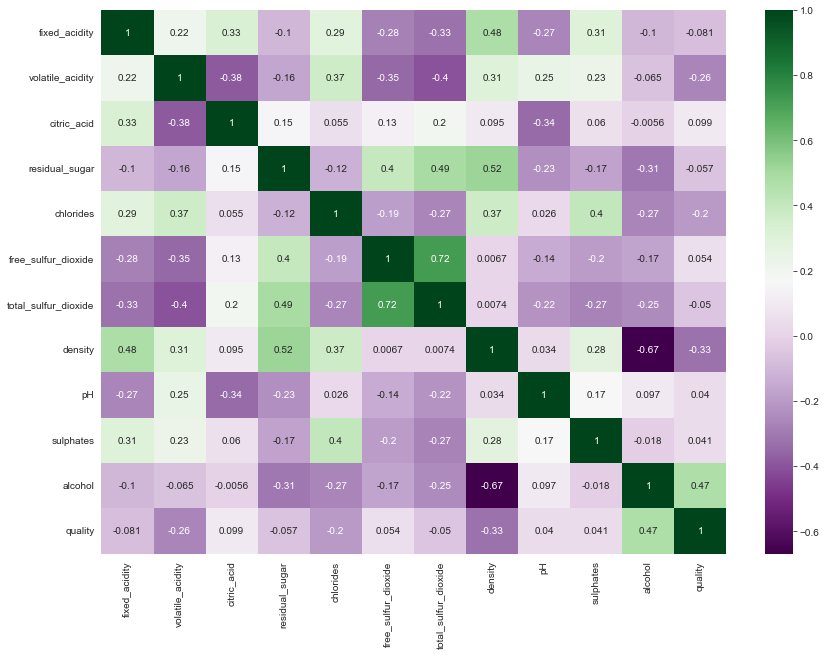

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='PRGn', annot=True);

In [21]:
corr_matrix.quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.469555
citric_acid             0.098764
free_sulfur_dioxide     0.054456
sulphates               0.041390
pH                      0.039953
total_sulfur_dioxide   -0.050387
residual_sugar         -0.057279
fixed_acidity          -0.080554
chlorides              -0.202318
volatile_acidity       -0.264203
density                -0.326978
Name: quality, dtype: float64

**Acohol** has a strong positive correlation with quality, whereas **density, volatile_acidity, chlorides** have strong negative correlations with quality. 

### Graphs representing relationships between features and quality

#### Here we see that fixed acidity does not give any specification to classify the quality.

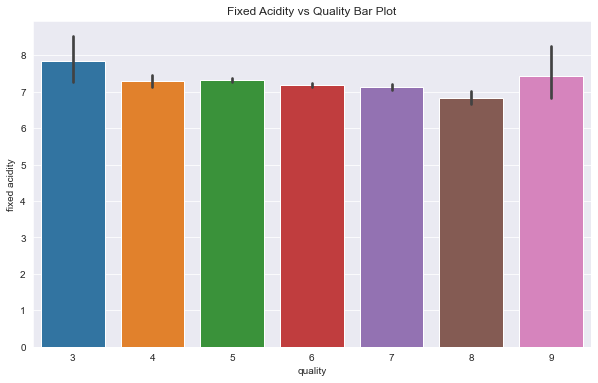

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df).set(title='Fixed Acidity vs Quality Bar Plot');

#### Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 


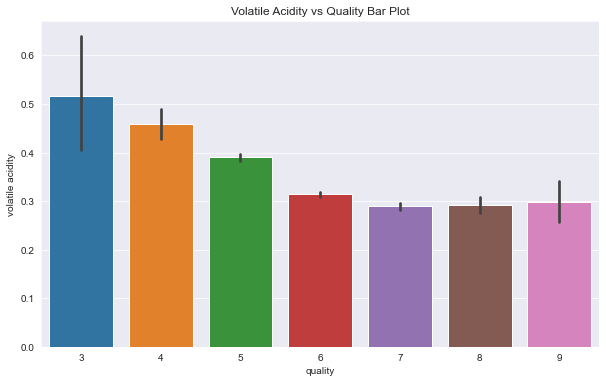

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df).set(title='Volatile Acidity vs Quality Bar Plot');

#### Composition of citric acid go higher as we go higher in the quality of the wine

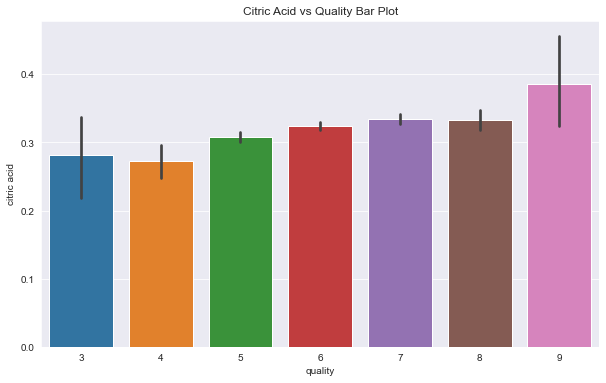

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df).set(title='Citric Acid vs Quality Bar Plot');

#### Residual sugar does not give any specification to classify quality

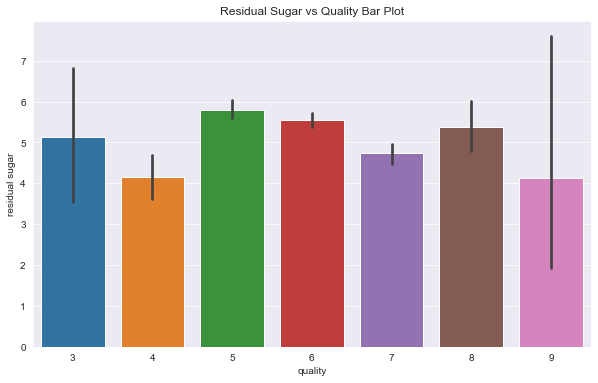

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df).set(title='Residual Sugar vs Quality Bar Plot');

#### Composition of chloride go down as we go higher in the quality of the wine

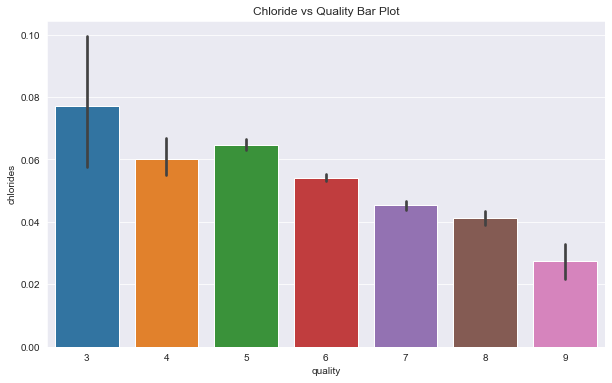

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df).set(title='Chloride vs Quality Bar Plot');

#### Sulphates level does not give any indication to calissify quality

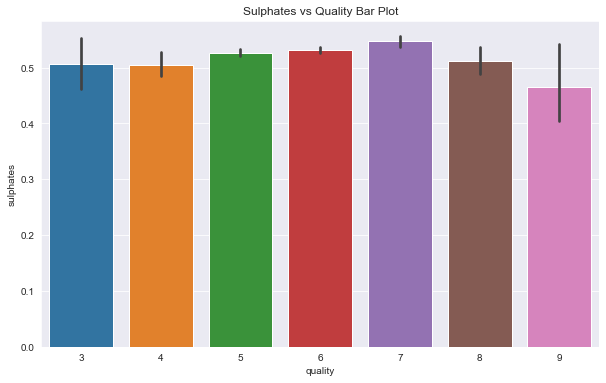

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df).set(title='Sulphates vs Quality Bar Plot');

#### Alcohol level also goes higher as the quality of wine increases

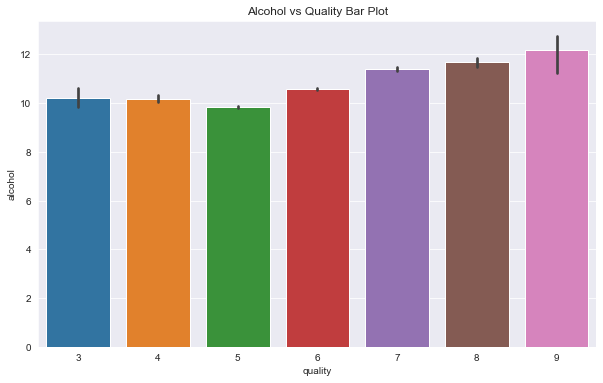

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df).set(title='Alcohol vs Quality Bar Plot');

Before building our Machine learning models to predict wine quality, we have done some research to see which features explain wine quality the best.

# Our research on features explaining wine quality:

*   **Alcohol** is by far one of the most important feature when it comes to wine 
quality, for both red and white wine. It gives a subtle impression of sweetness on the palate. Brings a hint of bitterness and is essential for both red and white wine.

*   **Free sulfur dioxide** plays a critical role in quality winemaking. It is the most common chemical compound and has preservative and antibacterial qualities, especially for red wine. Actually, it exists naturally in wine as a result of the fermentation process.

*   Although naturally present in wine, **sulfates** are added in addition to their natural production.
This is because they act as antioxidants and antiseptics.

*   Measuring the **pH** allows us to evaluate the amount of acid present, the strength of the acids, and the effects of minerals and other ingredients on the wine. The pH of wine is dependent on three main parameters: the total amount of acid present, the malic acid-tartaric acid ratio, and the amount of potassium present. Wines with little acid and too much potassium have a high pH. Wines with more tartaric acid, less malic acid, less potassium and more tritable acidity have lower pH values.

A wine with a low pH has many advantages. A low pH inhibits bacterial growth, balances the fermentation of sugars, and facilitates the control of malolactic fermentation. In addition, a low pH directly affects the heat stability of the wine, whether it's white or red.

A wine with a low pH is also more visually appealing. When their pH is lower, red and white wines retain a more intense color. Red wines have a more pleasant color and smell, and white wines do not go brown as easily.

<br/>

We can find similarities in red and white wine features but they are not made the same way.


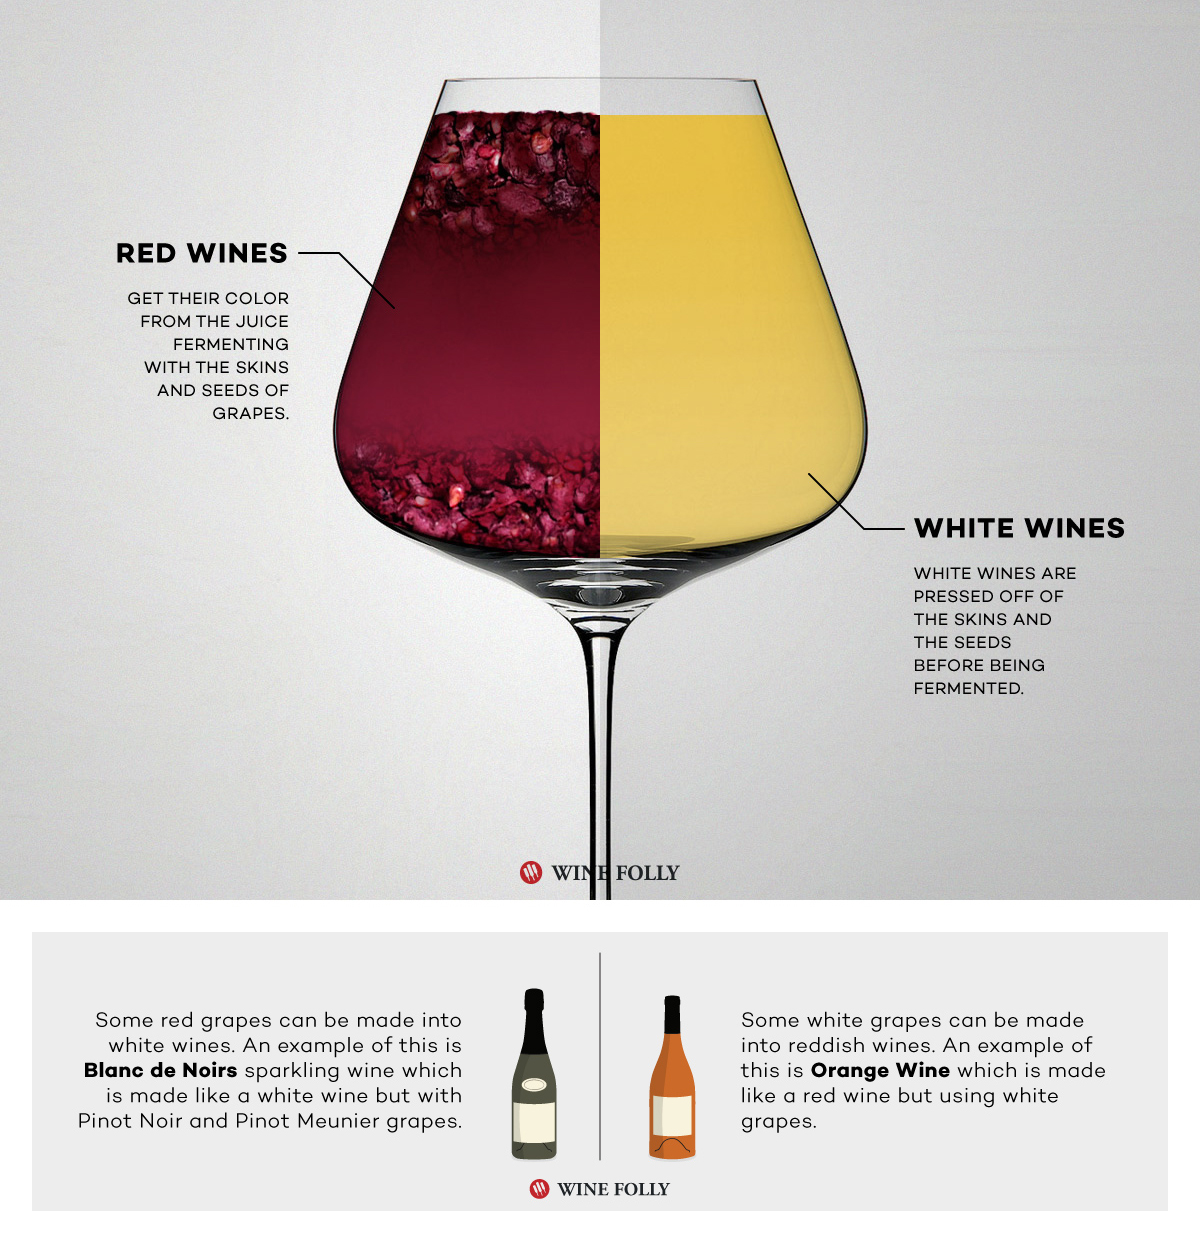


**SOURCES :** 


*   [Things that affect the wine quality](https://www.liquidline.se/blog/things-that-affect-the-wine-quality/)

*   [The role of sulfites in wine](https://www.dummies.com/article/home-auto-hobbies/food-drink/beverages/wine/the-role-of-sulfites-in-wine-195965)

*   [The difference between red and white wine](https://pediaa.com/what-is-the-difference-between-red-and-white-wine/#:~:text=That%20is%3B%20the%20red%20wine,main%20two%20types%20of%20wine.)

*   [Red wine vs White wine](https://winefolly.com/tips/red-wine-vs-white-wine-the-real-differences/)

*   [Weird wine flavors and the science behind them](https://winefolly.com/deep-dive/weird-wine-flavors-and-the-science-behind-them/)



It is important to know that a wine with high acidity will generally be crisper and more acidic in the mouth : red wines. A wine with low acidity will be softer and rounder in the mouth : white wines. Acidity provides some of the backbone necessary for long-term aging, so high acid wines are more likely to improve over time than low acid wines.


But it is all about balance. 
Indeed, based, on certain research:


*   we can say that **volatile acidity** is considered a fault at higher levels and can smell sharp like nail polish remover.
Indeed, volatile acidity is caused by a type of bacterial spoilage which produces large amounts Acetic acid (vinegar) which is a serious wine fault, the metabolization of acetic acid and alcohol (ethanol) can produce ethyl acetate.


As a consequence, this component requires very careful monitoring !

However, at very lower levels, volatile acid can add fruity-smelling raspberry, passion fruit, or cherry-like flavors for red wines.



*   When it comes to **chlorides**, they basically represent the amount of salt in wine.
This varies among wine produced from different geographic, geologic and climatic conditions.
Chlorides and quality appear a negative relationship for red and white wines,  which can be interpreted as not much salt is required for a good quality.
It is therefore possible that very low chlorides is an indicator of good wine.





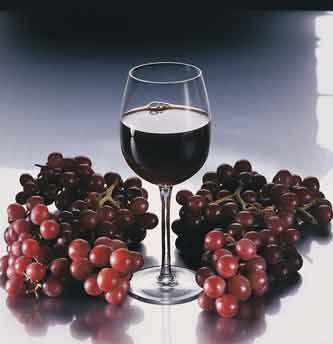



**SOURCES:**  



*   [What is acidity in wine ? ](https://www.winemag.com/2019/06/19/what-is-acidity-in-wine/)
*   [Volatile acidity in wine making](https://enology.umn.edu/news/volatile-acidity-wine-making)

*   [Chloride concentration in red wine](https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf&lang=en)

*   [texte du lien](https://)





# Models explanation (for the entire dataset)


## Regression models
Regression models perform the task to predict a dependent variable value (Wine Quality) based on 13 independent variables of the dataset (fixed_acidity, volatile_acidity, citric_acid, residual_sugar,chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, type_red, type_white)

We try four different models which are Support Vector Regression, Linear Regression, Decision Tree and Random Forest to see which one performs the best for the prediction of wine quality.

We split the dataset into two parts: 80% train set and 20% test set 


In [29]:
import numpy as np

from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [30]:
np.random.seed(42)

In [31]:
X = data.drop(["quality", "quality_cat"], axis= 1)
y = data["quality"]

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4263, 13), (4263,), (1066, 13), (1066,))

In [33]:
features = X.columns

# Support Vector Regression

In [34]:
regressor = svm.SVR() 
regressor.fit(X_train, y_train)
r2_train_svr = regressor.score(X_train, y_train)
r2_test_svr = regressor.score(X_valid, y_valid)
r2_train_svr, r2_test_svr

(0.17381138317913525, 0.14996170357598915)

In [35]:
# Evaluating perfomance using 10-fold cross validation
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
svr_mae_scores = -scores
print("%f accuracy with a standard deviation of %f" % (svr_mae_scores.mean(), svr_mae_scores.std()))

0.623768 accuracy with a standard deviation of 0.020983


In [36]:
# # MAE of support vector regression model
svr_predict = regressor.predict(X_valid)
mae_svr = mean_absolute_error(y_valid,svr_predict)
mae_svr

0.6277077218418445

After fitting the train set and calculating the R squared, we observe that the scores are 0.17381 and 0.14996 on train set and test set respectively, which means 17.381% and 14.996% of the variation in the quality is explained by the features.

The average MAE score on 10-fold cross validation is  0.623768 with a standard deviation of 0.020983

The MAE score on test set is 0.6277

### Linear Regression

In [37]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
r2_train_lr = linear_reg.score(X_train,y_train)
r2_test_lr = linear_reg.score(X_valid, y_valid)
r2_train_lr, r2_test_lr

(0.3167669571566699, 0.27923492662303295)

In [38]:
# Evaluating perfomance using 10-fold cross validation
scores = cross_val_score(linear_reg, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
linear_mae_scores = -scores
print("%f accuracy with a standard deviation of %f" % (linear_mae_scores.mean(), linear_mae_scores.std()))

0.566710 accuracy with a standard deviation of 0.017852


In [39]:
# MAE of linear regression model
linear_reg_predict = linear_reg.predict(X_valid)
mae_linear = mean_absolute_error(y_valid, linear_reg_predict)
mae_linear

0.5653803566768089

Here we observe that the scores are 0.31677 and 0.27923 on train set and test set respectively, which means 31.677% and 27.923% of the variation in the quality is explained by the features. Compare with the support vector regression model, this model seems to perform better.

The average MAE score on 10-fold cross validation is  0.566710 with a standard deviation of 0.017852, which is better than support vector regression model.

The MAE score on the test set is 0.5654, which is also better than support vector regression.


### Decision Tree

In [40]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
r2_train_dtr = tree_reg.score(X_train,y_train)
r2_test_dtr = tree_reg.score(X_valid, y_valid)
r2_train_dtr, r2_test_dtr

(1.0, -0.25838868824423544)

In [41]:
# Evaluating perfomance using 10-fold cross validation
scores = cross_val_score(tree_reg, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
tree_mae_scores = -scores
print("%f accuracy with a standard deviation of %f" % (tree_mae_scores.mean(), tree_mae_scores.std()))

0.670652 accuracy with a standard deviation of 0.036832


In [42]:
# MAE of decision tree regression model on test set
tree_reg_predict = tree_reg.predict(X_valid)
mae_tree = mean_absolute_error(y_valid, tree_reg_predict)
mae_tree

0.6744840525328331

Here we observe that the scores are 1.0 and -0.25839 on train set and test set respectively, which means this model fits the data poorly and it’s overfitting. 

The average MAE score on 10-fold cross validation and the MAE score on test set are 0.6707 and 0.6745 respectively. This is the worst model we have seen so far.


### Random Forest Regression

In [43]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train,y_train)
r2_train_rfr = forest_reg.score(X_train,y_train)
r2_test_rfr = forest_reg.score(X_valid, y_valid)
r2_train_rfr, r2_test_rfr

(0.9151162119646895, 0.36078161873642534)

In [44]:
# Evaluating perfomance using 10-fold cross validation
scores = cross_val_score(forest_reg, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
forest_mae_scores = -scores
print("%f accuracy with a standard deviation of %f" % (forest_mae_scores.mean(), forest_mae_scores.std()))

0.530258 accuracy with a standard deviation of 0.014953


In [45]:
# MAE of random forest regression model
forest_reg_predict = forest_reg.predict(X_valid)
mae_forest = mean_absolute_error(y_valid, forest_reg_predict)
mae_forest

0.5400844277673547

Here we observe that the R-squared are 0.91511 and 0.36078 on train set and test set respectively, which means 91.511% and 36.078% of the variation in the quality is explained by the features. This model is overfitting as well.

The average MAE score on 10-fold cross validation is  0.530258 with a standard deviation of 0.014953 and the MAE score on test set is 0.54008. It’s the best score compared to any other previous model.


In [46]:
imp = forest_reg.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.264029
volatile_acidity        0.117315
free_sulfur_dioxide     0.091298
sulphates               0.079934
residual_sugar          0.073652
total_sulfur_dioxide    0.069570
chlorides               0.067084
pH                      0.064737
citric_acid             0.059682
fixed_acidity           0.055775
density                 0.054801
type_red                0.001083
type_white              0.001038
dtype: float64

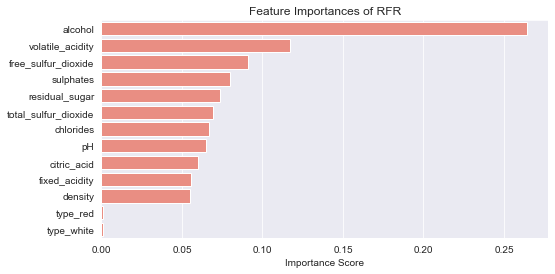

In [47]:
plt.figure(figsize=[8,4])
plt.title('Feature Importances of RFR')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

By using the feature importance function, we notice that alcohol, volatile_acidity, free_sulfer_dioxide, sulphates are the top four features that affect the quality. According to the correlation we observed before, the alcohol is still the most important feature.

Since we consider random forest regression is the best model so far, we are going to fix the overfitting problem by using hyperparameter tuning.

### Hyperparameter tuning

In [48]:
params = {'n_estimators' : [300, 400, 500], 
          'max_depth': [15, 20, 25], 
          'min_samples_leaf': [2, 4, 6],
          'max_features': [4, 5, 6, 7]}

grid_search = GridSearchCV(forest_reg, 
                              params, 
                              verbose=1, 
                              cv=3)

In [49]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [15, 20, 25],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [300, 400, 500]},
             verbose=1)

In [50]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=25, max_features=4, min_samples_leaf=2,
                      n_estimators=500, random_state=42)

In [51]:
best_forest = grid_search.best_estimator_
best_forest.fit(X_train,y_train)
r2_best_train = best_forest.score(X_train,y_train)
r2_best_test = best_forest.score(X_valid,y_valid)
r2_best_train, r2_best_test

(0.8448179236924797, 0.38171570168099)

In [52]:
scores = cross_val_score(best_forest, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
best_forest_mae_scores = -scores
print("%f accuracy with a standard deviation of %f" % (best_forest_mae_scores.mean(), best_forest_mae_scores.std()))

0.526336 accuracy with a standard deviation of 0.014704


In [53]:
best_forest_predict = best_forest.predict(X_valid)
mae_best_forest = mean_absolute_error(y_valid, best_forest_predict)
mae_best_forest

0.5336743278885775

In [54]:
imp = best_forest.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.203692
density                 0.109901
volatile_acidity        0.103453
free_sulfur_dioxide     0.091447
chlorides               0.078410
total_sulfur_dioxide    0.073847
sulphates               0.073724
residual_sugar          0.069499
citric_acid             0.069151
pH                      0.063711
fixed_acidity           0.057778
type_white              0.002729
type_red                0.002658
dtype: float64

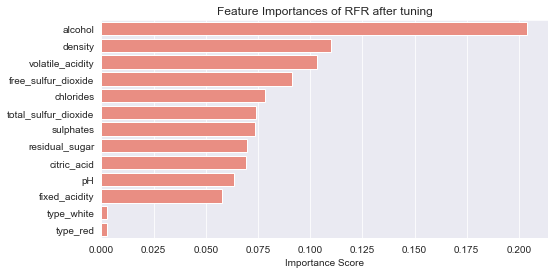

In [55]:
plt.figure(figsize=[8,4])
plt.title('Feature Importances of RFR after tuning')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

Thanks to grid search cv,  we find the best estimator which has max_depth=25, max_features=4, min_samples_leaf=2, n_estimators=500, random_state=42.

After tuning, we observe that the scores are 0.84481 and 0.38172 on train set and test set respectively, which is better compared to the original random forest model. But it’s still overfitting.

The average MAE score on 10-fold cross validation is  0.526336 with a standard deviation of 0.014704 and the MAE score on test set is 0.53367.

By using feature importance function, we noticed that the importance of feature has changed. Alcohol is still the most important feature but Density now becomes the second most important feature for quality. This makes sense because we saw the density has the strongest negative correlation with quality.



### Comparison among regression models

In [56]:
d = {'model': ["SVR", "Linear", "Decision Tree", "Random Forest", "Regularized RF"],
     'r2_train': [r2_train_svr, r2_train_lr, r2_train_dtr, r2_train_rfr, r2_best_train], 
     'r2_test': [r2_test_svr, r2_test_lr, r2_test_dtr, r2_test_rfr, r2_best_test], 
     "mae_cv_avg": [svr_mae_scores.mean(), linear_mae_scores.mean(), tree_mae_scores.mean(), forest_mae_scores.mean(), best_forest_mae_scores.mean()], 
     "mae_cv_std": [svr_mae_scores.std(), linear_mae_scores.std(), tree_mae_scores.std(), forest_mae_scores.std(), best_forest_mae_scores.std()], 
     "mae_test": [mae_svr, mae_linear, mae_tree, mae_forest, mae_best_forest]}
reg_compare = pd.DataFrame(data=d)
reg_compare

,model,r2_train,r2_test,mae_cv_avg,mae_cv_std,mae_test
0,SVR,0.173811,0.149962,0.623768,0.020983,0.627708
1,Linear,0.316767,0.279235,0.566710,0.017852,0.565380
2,Decision Tree,1.000000,-0.258389,0.670652,0.036832,0.674484
3,Random Forest,0.915116,0.360782,0.530258,0.014953,0.540084
4,Regularized RF,0.844818,0.381716,0.526336,0.014704,0.533674


After comparing all the models we applied before, the tuned random forest regression model has the best metrics.<br><br>
**Since the model is still overfitting, we decided to perform Classification models on our dataset.**

## Classification models

Classification models perform the task to predict a dependent variable value (Wine Quality Categories: Low, Medium or High) based on 13 independent variables of the dataset (fixed_acidity, volatile_acidity, citric_acid, residual_sugar,chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, type_red, type_white)

We try four different models which are: Support Vector Classification, K-nearest Neighbors, Decision Tree and Random Forest to see which one performs the best for the prediction of wine quality categories.

We split the dataset into two parts: 80% train set and 20% test set 

Because our dataset has imbalanced classes and all classes are equally important, we choose the classifier that gets highest F1 scores on all classes.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

In [58]:
np.random.seed(42)

In [59]:
data['quality_labels'] = data['quality_cat'].map({'low': 0, 'medium': 1, 'high': 2})
X = data.drop(["quality", "quality_cat", "quality_labels"], axis= 1)
y = data["quality_labels"]

In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4263, 13), (4263,), (1066, 13), (1066,))

In [61]:
features = X.columns

### Support Vector Classification

In [62]:
svc_clf = svm.SVC()
svc_clf.fit(X_train, y_train)
acc_train_svc = svc_clf.score(X_train, y_train)
acc_test_svc = svc_clf.score(X_valid, y_valid) 
acc_train_svc, acc_test_svc

(0.7665962936898898, 0.7636022514071295)

In [63]:
svc_clf_predict = svc_clf.predict(X_valid)
macro_f1_svc = f1_score(y_valid, svc_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_svc)

Macro f1 score: 0.2886524822695035


In [64]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_svc = cross_val_score(svc_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_svc)

Average f1 score: 0.28929313503927734


After fitting and calculating the accuracy score, we observe that the scores are 0.7666 and 0.7636 on the train set and test set respectively. The model seems to perform well based on the accuracy scores, however the F1 scores are relatively low which are 0.289 on test set and 0.288 on cross validation.

###  K-nearest Neighbors

In [65]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
acc_train_knn = knn_clf.score(X_train, y_train)
acc_test_knn = knn_clf.score(X_valid, y_valid) 
acc_train_knn, acc_test_knn

(0.8076471968097584, 0.7589118198874296)

In [66]:
knn_clf_predict = knn_clf.predict(X_valid)
macro_f1_knn = f1_score(y_valid, knn_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_knn)

Macro f1 score: 0.3941340464766699


In [67]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_knn = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_knn)

Average f1 score: 0.3993625120492052


Here we observe that the accuracy scores are 0.8076 and 0.7589 on the train set and test set respectively. The model also seems to perform well based on the accuracy scores. Although the F1 scores are better than SVC, they are still low which are 0.3941 on test set and 0.3994 on cross validation.

### Decision Tree

In [68]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
acc_train_tree = tree_clf.score(X_train, y_train)
acc_test_tree = tree_clf.score(X_valid, y_valid) 
acc_train_tree, acc_test_tree

(1.0, 0.702626641651032)

In [69]:
tree_clf_predict = tree_clf.predict(X_valid)
macro_f1_tree = f1_score(y_valid, tree_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_tree)

Macro f1 score: 0.4941330286874841


In [70]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_tree = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_tree)

Average f1 score: 0.4831491262749935


Here we observe that the scores are 1 and 0.7026 on the train set and test set respectively. The model performs perfectly on train set but not well on test set compared to other models, based on the accuracy score. However the F1 scores are much higher which are 0.494 for test set and  0.483 for cross validation.

### Random Forest Classification

In [71]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
acc_train_forest = forest_clf.score(X_train, y_train)
acc_test_forest = forest_clf.score(X_valid, y_valid) 
acc_train_forest, acc_test_forest

(0.9997654234107436, 0.7964352720450282)

In [72]:
forest_clf_predict = forest_clf.predict(X_valid)
macro_f1_forest= f1_score(y_valid, forest_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_forest)

Macro f1 score: 0.45572575123934894


In [73]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_forest = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_forest)

Average f1 score: 0.4777568876155901


Here we observe that the scores are 0.9997 and 0.7964 on the train set and test set respectively. The model performs best on both train and test sets compared to other models, based on the accuracy score. But the F1 scores are 0.4557 and 
0.4778 which are a little bit lower than those of the decision tree.

In [74]:
imp = forest_clf.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.142829
density                 0.114007
chlorides               0.088516
total_sulfur_dioxide    0.087086
volatile_acidity        0.086780
free_sulfur_dioxide     0.085793
sulphates               0.082339
residual_sugar          0.081706
pH                      0.079886
citric_acid             0.073689
fixed_acidity           0.071530
type_white              0.003146
type_red                0.002694
dtype: float64

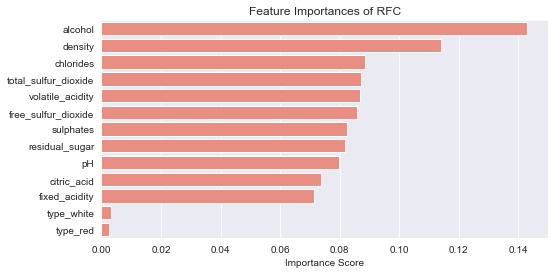

In [75]:
plt.figure(figsize=[8,4])
plt.title('Feature Importances of RFC')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

By using feature importance function, we noticed that the importance of feature has changed. Alcohol and density  are still the most important features for quality. For this model, chlorides importance comes third after alcohol and density.

Since this is the best model so far, we decided to tune the hyperparameters to optimize our random forest classification model. It is done through a great search in order to get the best combination of parameters which would result most efficient model.

### Hyperparameter tuning

In [76]:
params = {'n_estimators' : [300, 400, 500], 
          'max_depth': [15, 20, 25], 
          'min_samples_leaf': [2, 3, 4],
          'max_features': [4, 6, 8]}

grid_search = GridSearchCV(forest_clf, 
                              params, 
                              verbose=1, 
                              cv=3)

In [77]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [15, 20, 25], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [300, 400, 500]},
             verbose=1)

In [78]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=4,
                       n_estimators=300, random_state=42)

In [79]:
best_forest = grid_search.best_estimator_
best_forest.fit(X_train,y_train)
acc_best_train = best_forest.score(X_train,y_train)
acc_best_test = best_forest.score(X_valid,y_valid)
acc_best_train, acc_best_test

(0.9110954726718273, 0.7964352720450282)

In [80]:
best_forest_predict = best_forest.predict(X_valid)
macro_f1_best= f1_score(y_valid, best_forest_predict, average='macro')
print("Macro f1 score:", macro_f1_best)

Macro f1 score: 0.45158694357734436


In [81]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_best = cross_val_score(best_forest, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_best)

Average f1 score: 0.4476424605094877


In [82]:
imp = best_forest.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.189462
density                 0.119012
volatile_acidity        0.086660
chlorides               0.084102
free_sulfur_dioxide     0.082543
total_sulfur_dioxide    0.079575
residual_sugar          0.077194
sulphates               0.075564
pH                      0.073109
citric_acid             0.067351
fixed_acidity           0.059961
type_red                0.002985
type_white              0.002483
dtype: float64

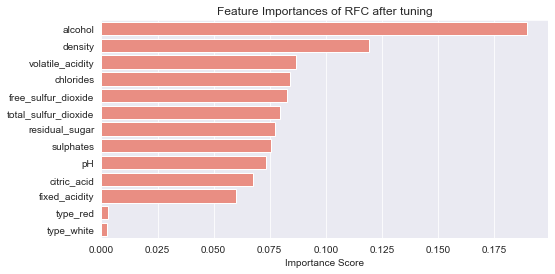

In [83]:
plt.figure(figsize=[8,4])
plt.title('Feature Importances of RFC after tuning')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

We find the best estimator after tuning that has max_depth=20, max_features=4, min_samples_leaf=4,
n_estimators=300, random_state=42.

After fitting we observe that the scores are 0.911 and  0.796 on the train set and test set respectively. The model performs best on both train and test sets compared to other models, based on the accuracy score. But the F1 scores are 0.451 and 
0.447 which are a little bit lower than those of the random forest.

**Alcohol** and **density**  are still the most important features for quality. For this model, **volatile_acidity** and **chlorides**  come third and fourth place after alcohol and density.

### Comparison among classification models

In [84]:
com = {'model': ["SVC", "KNN", "Decision Tree", "Random Forest", "Regularized RF"],
     'acc_train': [acc_train_svc, acc_train_knn, acc_train_tree, acc_train_forest, acc_best_train], 
     'acc_test': [acc_test_svc, acc_test_knn, acc_test_tree, acc_test_forest, acc_best_test], 
     'macro_f1': [macro_f1_svc, macro_f1_knn, macro_f1_tree, macro_f1_forest, macro_f1_best],
     "f1_cv_avg": [f1_cv_svc, f1_cv_knn, f1_cv_tree, f1_cv_forest, f1_cv_best]} 
clf_compare = pd.DataFrame(data=com).set_index('model')
clf_compare

,acc_train,acc_test,macro_f1,f1_cv_avg
model,,,,
SVC,0.766596,0.763602,0.288652,0.289293
KNN,0.807647,0.758912,0.394134,0.399363
Decision Tree,1.000000,0.702627,0.494133,0.483149
Random Forest,0.999765,0.796435,0.455726,0.477757
Regularized RF,0.911095,0.796435,0.451587,0.447642


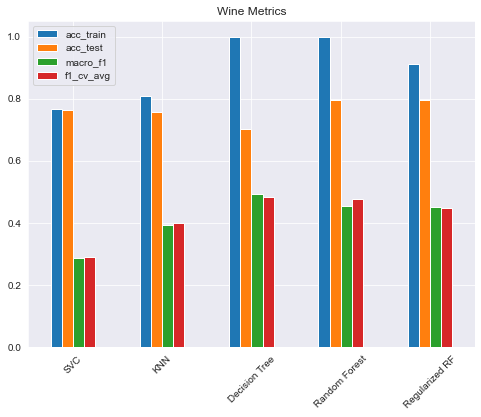

In [85]:
clf_compare.plot(kind='bar',title="Wine Metrics", xlabel='', rot=45, figsize=(8,6));

After comparing all the models we applied before, the tuned random forest regression model has the best metrics.

# Next Step
We decided to split the dataset into different types of wine subsets (red and white) in order to check whether wine type have a direct impact on quality. By doing that we expect so see whether feature importance varies when dealing with seperate datasets.

The motivation behind this step is by noticing that red wines are usually ranked higher in quality compared to white wines.

## White Wine quality categories classification

The following models which are performed on the white wine dataset are a replica of the classification models applied to the entire dataset. 

In [86]:
np.random.seed(42)

In [87]:
white = data.loc[data.type_white == 1].drop(["type_white", "type_red"], axis = 1)
white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_cat,quality_labels
0,7.0,0.270000,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,1
1,6.3,0.300000,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,1
2,8.1,0.280000,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,1
3,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,1
4,6.2,0.320000,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,6.2,0.210000,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,1
3966,6.6,0.320000,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium,1
3967,6.5,0.344123,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,1
3968,5.5,0.290000,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,2


In [88]:
X = white.drop(["quality", "quality_cat", "quality_labels"], axis= 1)
y = white["quality_labels"]

In [89]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3176, 11), (3176,), (794, 11), (794,))

In [90]:
features = X.columns

### Support Vector Classification

In [91]:
svc_clf = svm.SVC()
svc_clf.fit(X_train, y_train)
acc_train_svc = svc_clf.score(X_train, y_train)
acc_test_svc = svc_clf.score(X_valid, y_valid) 
acc_train_svc, acc_test_svc

(0.7493702770780857, 0.743073047858942)

In [92]:
svc_clf_predict = svc_clf.predict(X_valid)
svc_clf_predict = svc_clf.predict(X_valid)
macro_f1_svc = f1_score(y_valid, svc_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_svc)

Macro f1 score: 0.2842003853564547


In [93]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_svc = cross_val_score(svc_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_svc)

Average f1 score: 0.28557737593708815


###  K-nearest Neighbors

In [94]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
acc_train_knn = knn_clf.score(X_train, y_train)
acc_test_knn = knn_clf.score(X_valid, y_valid) 
acc_train_knn, acc_test_knn

(0.8041561712846348, 0.7292191435768262)

In [95]:
knn_clf_predict = knn_clf.predict(X_valid)
macro_f1_knn = f1_score(y_valid, knn_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_knn)

Macro f1 score: 0.41830970495764414


In [96]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_knn = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_knn)

Average f1 score: 0.44755622189665745


### Decision Tree

In [97]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
acc_train_tree = tree_clf.score(X_train, y_train)
acc_test_tree = tree_clf.score(X_valid, y_valid) 
acc_train_tree, acc_test_tree

(1.0, 0.6914357682619647)

In [98]:
tree_clf_predict = tree_clf.predict(X_valid)
macro_f1_tree = f1_score(y_valid, tree_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_tree)

Macro f1 score: 0.4954729225080505


In [99]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_tree = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_tree)

Average f1 score: 0.4921189688543926


### Random Forest Classification

In [100]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
acc_train_forest = forest_clf.score(X_train, y_train)
acc_test_forest = forest_clf.score(X_valid, y_valid) 
acc_train_forest, acc_test_forest

(1.0, 0.7997481108312342)

In [101]:
forest_clf_predict = forest_clf.predict(X_valid)
macro_f1_forest= f1_score(y_valid, forest_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_forest)

Macro f1 score: 0.5230646281229939


In [102]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_foresr = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_forest)

Average f1 score: 0.4777568876155901


In [103]:
imp = forest_clf.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.140910
density                 0.119303
free_sulfur_dioxide     0.096952
residual_sugar          0.088048
total_sulfur_dioxide    0.087793
volatile_acidity        0.087145
sulphates               0.081087
pH                      0.080588
chlorides               0.080267
citric_acid             0.069195
fixed_acidity           0.068712
dtype: float64

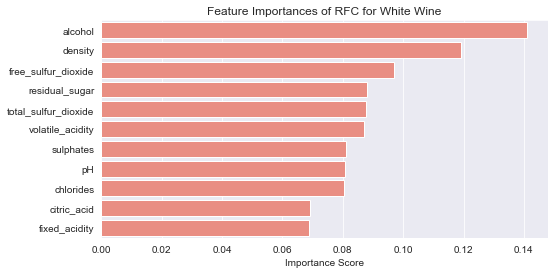

In [104]:
plt.figure(figsize=[8,4])
plt.title('Feature Importances of RFC for White Wine')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

### Hyperparameter tuning

In [105]:
params = {'n_estimators' : [300, 400, 500], 
          'max_depth': [15, 20, 25], 
          'min_samples_leaf': [2, 3, 4],
          'max_features': [4, 6, 8]}

grid_search = GridSearchCV(forest_clf, 
                              params, 
                              verbose=1, 
                              cv=3)

In [106]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [15, 20, 25], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [300, 400, 500]},
             verbose=1)

In [107]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=6, min_samples_leaf=2,
                       n_estimators=500, random_state=42)

In [108]:
best_forest = grid_search.best_estimator_
best_forest.fit(X_train,y_train)
acc_best_train = best_forest.score(X_train,y_train)
acc_best_test = best_forest.score(X_valid,y_valid)
acc_best_train, acc_best_test

(0.9637909319899244, 0.8073047858942065)

In [109]:
best_forest_predict = best_forest.predict(X_valid)
macro_f1_best= f1_score(y_valid, best_forest_predict, average='macro')
print("Macro f1 score:", macro_f1_best)

Macro f1 score: 0.5480363368931099


In [110]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_best = cross_val_score(best_forest, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_best)

Average f1 score: 0.47531561133176936


In [111]:
imp = best_forest.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.176111
density                 0.111412
free_sulfur_dioxide     0.106763
volatile_acidity        0.086475
pH                      0.082175
total_sulfur_dioxide    0.080690
residual_sugar          0.079498
sulphates               0.076441
chlorides               0.073231
citric_acid             0.066444
fixed_acidity           0.060760
dtype: float64

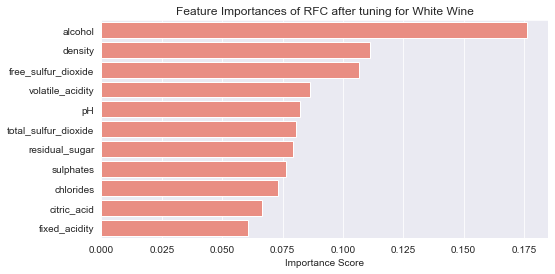

In [112]:
plt.figure(figsize=[8,4])
plt.title('Feature Importances of RFC after tuning for White Wine')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

We can see here the top 6 features that predict the red wine quality are **alcohol**, **density**, **free_sulfur_dioxide**, **volatile_acidity**, **pH**,and **total_sulfur_dioxide**

### Comparison among classification models for white wine

In [113]:
com = {'model': ["SVC", "KNN", "Decision Tree", "Random Forest", "Regularized RF"],
     'acc_train': [acc_train_svc, acc_train_knn, acc_train_tree, acc_train_forest, acc_best_train], 
     'acc_test': [acc_test_svc, acc_test_knn, acc_test_tree, acc_test_forest, acc_best_test], 
     'macro_f1': [macro_f1_svc, macro_f1_knn, macro_f1_tree, macro_f1_forest, macro_f1_best],
     "f1_cv_avg": [f1_cv_svc, f1_cv_knn, f1_cv_tree, f1_cv_forest, f1_cv_best]} 
clf_compare = pd.DataFrame(data=com).set_index('model')
clf_compare

,acc_train,acc_test,macro_f1,f1_cv_avg
model,,,,
SVC,0.749370,0.743073,0.284200,0.285577
KNN,0.804156,0.729219,0.418310,0.447556
Decision Tree,1.000000,0.691436,0.495473,0.492119
Random Forest,1.000000,0.799748,0.523065,0.477757
Regularized RF,0.963791,0.807305,0.548036,0.475316


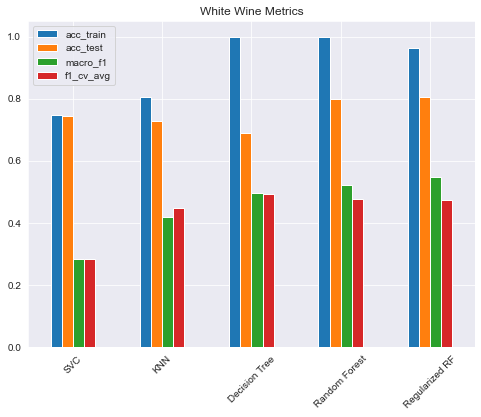

In [114]:
clf_compare.plot(kind='bar',title="White Wine Metrics", xlabel='', rot=45, figsize=(8,6));


The best performing model to predict white wine quality category is still the regularized random forest as shown the table above having the most appropriate scores compared to the other models.
The reason for this is the tuning of hyperparameters implemented on the random forest which makes the model less prone to errors (with the best estimator that has max_depth=15, max_features=6, min_samples_leaf=2, n_estimators=500, random_state=42).

## Red Wine quality categories classification

The following models which are performed on the red wine dataset are a replica of the classification models applied to the entire dataset. 

In [115]:
np.random.seed(42)

In [116]:
red = data.loc[data.type_red == 1].drop(["type_white", "type_red"], axis = 1)
red

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_cat,quality_labels
3970,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,5,medium,1
3971,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680000,9.8,5,medium,1
3972,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650000,9.8,5,medium,1
3973,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580000,9.8,6,medium,1
3974,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.560000,9.4,5,medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6,medium,1
5325,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,medium,1
5326,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.533268,11.2,6,medium,1
5327,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,medium,1


In [117]:
X = red.drop(["quality", "quality_cat", "quality_labels"], axis= 1)
y = red["quality_labels"]

In [118]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1087, 11), (1087,), (272, 11), (272,))

In [119]:
features = X.columns

### Support Vector Classification

In [120]:
svc_clf = svm.SVC()
svc_clf.fit(X_train, y_train)
acc_train_svc = svc_clf.score(X_train, y_train)
acc_test_svc = svc_clf.score(X_valid, y_valid) 
acc_train_svc, acc_test_svc

(0.8187672493100276, 0.8235294117647058)

In [121]:
svc_clf_predict = svc_clf.predict(X_valid)
macro_f1_svc = f1_score(y_valid, svc_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_svc)

Macro f1 score: 0.31999228841334104


In [122]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_svc = cross_val_score(svc_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_svc)

Average f1 score: 0.2999331691862511


###  K-nearest Neighbors

In [123]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
acc_train_knn = knn_clf.score(X_train, y_train)
acc_test_knn = knn_clf.score(X_valid, y_valid) 
acc_train_knn, acc_test_knn

(0.8491260349586016, 0.8345588235294118)

In [124]:
knn_clf_predict = knn_clf.predict(X_valid)
macro_f1_knn = f1_score(y_valid, knn_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_knn)

Macro f1 score: 0.47239280327515615


In [125]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_knn = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_knn)

Average f1 score: 0.394167962887389


### Decision Tree

In [126]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
acc_train_tree = tree_clf.score(X_train, y_train)
acc_test_tree = tree_clf.score(X_valid, y_valid) 
acc_train_tree, acc_test_tree

(1.0, 0.7830882352941176)

In [127]:
tree_clf_predict = tree_clf.predict(X_valid)
macro_f1_tree = f1_score(y_valid, tree_clf_predict, average='macro')
print("Macro f1 score:", macro_f1_tree)

Macro f1 score: 0.5420772946859903


In [128]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_tree = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_tree)

Average f1 score: 0.46318135194814414


### Random Forest Classification

Predict quality accurately
What features make for a high quality wine (scored higher than 7)
What are the determinants for bad quality wine (scored below 3)

In [129]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
acc_train_forest = forest_clf.score(X_train, y_train)
acc_test_forest = forest_clf.score(X_valid, y_valid) 
acc_train_forest, acc_test_forest

(1.0, 0.8639705882352942)

In [130]:
forest_clf_predict = forest_clf.predict(X_valid)
macro_f1_forest= f1_score(y_valid, forest_clf_predict, average='macro')
print("Macro average f1 score:", macro_f1_forest)

Macro average f1 score: 0.5048992852501625


In [131]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_forest = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_forest)

Average f1 score: 0.423296711119361


In [132]:
imp = forest_clf.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.133959
volatile_acidity        0.117454
sulphates               0.107866
density                 0.089008
residual_sugar          0.087123
citric_acid             0.086248
total_sulfur_dioxide    0.086124
chlorides               0.080733
fixed_acidity           0.078965
pH                      0.070514
free_sulfur_dioxide     0.062007
dtype: float64

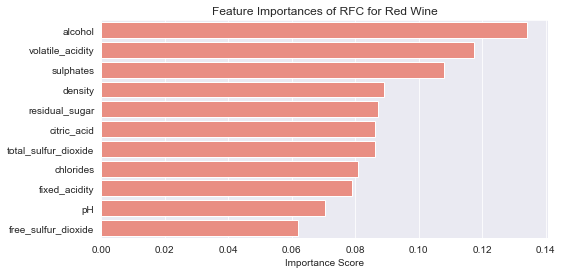

In [133]:
plt.figure(figsize=[8,4])
plt.title('Feature Importances of RFC for Red Wine')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

### Hyperparameter tuning

In [134]:
params = {'n_estimators' : [300, 400, 500], 
          'max_depth': [15, 20, 25], 
          'min_samples_leaf': [2, 3, 4],
          'max_features': [4, 6, 8]}

grid_search = GridSearchCV(forest_clf, 
                              params, 
                              verbose=1, 
                              cv=3)

In [135]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [15, 20, 25], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [300, 400, 500]},
             verbose=1)

In [136]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=4, min_samples_leaf=4,
                       n_estimators=400, random_state=42)

In [137]:
best_forest = grid_search.best_estimator_
best_forest.fit(X_train,y_train)
acc_best_train = best_forest.score(X_train,y_train)
acc_best_test = best_forest.score(X_valid,y_valid)
acc_best_train, acc_best_test

(0.9144434222631095, 0.8676470588235294)

In [138]:
best_forest_predict = best_forest.predict(X_valid)
macro_f1_best= f1_score(y_valid, best_forest_predict, average='macro')
print("Macro f1 score:", macro_f1_best)

Macro f1 score: 0.5043071621954222


In [139]:
# Evaluating perfomance using 10-fold cross validation
f1_cv_best = cross_val_score(best_forest, X_train, y_train, cv=10, scoring="f1_macro").mean()
print("Average f1 score:", f1_cv_best)

Average f1 score: 0.43046823282579283


In [140]:
imp = best_forest.feature_importances_
indices = np.argsort(imp)
features_imp = pd.Series(imp,index=features).sort_values(ascending=False)
features_imp

alcohol                 0.180845
volatile_acidity        0.133059
sulphates               0.125171
total_sulfur_dioxide    0.081319
citric_acid             0.081254
density                 0.081024
chlorides               0.068449
fixed_acidity           0.068437
residual_sugar          0.066136
pH                      0.058966
free_sulfur_dioxide     0.055340
dtype: float64

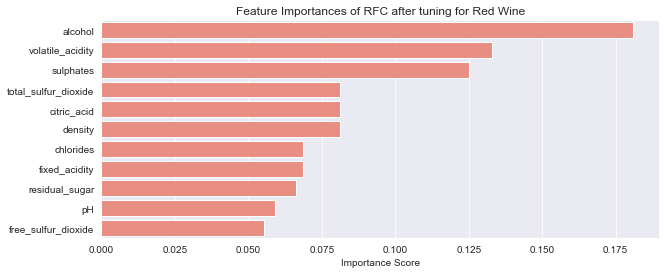

In [141]:
plt.figure(figsize=[10,4])
plt.title('Feature Importances of RFC after tuning for Red Wine')
plt.xlabel('Importance Score');
sns.barplot(x=features_imp, y=features_imp.index, color='salmon')
plt.show()

We can see here the top 4 features that predict the red wine quality are **alcohol**, **volatile_acidity**, **sulphates** and **total_sulfur_dioxide**

### Comparison among classification models for red wine

In [142]:
com = {'model': ["SVC", "KNN", "Decision Tree", "Random Forest", "Regularized RF"],
     'acc_train': [acc_train_svc, acc_train_knn, acc_train_tree, acc_train_forest, acc_best_train], 
     'acc_test': [acc_test_svc, acc_test_knn, acc_test_tree, acc_test_forest, acc_best_test], 
     'macro_f1': [macro_f1_svc, macro_f1_knn, macro_f1_tree, macro_f1_forest, macro_f1_best],
     "f1_cv_avg": [f1_cv_svc, f1_cv_knn, f1_cv_tree, f1_cv_forest, f1_cv_best]} 
clf_compare = pd.DataFrame(data=com).set_index('model')
clf_compare

,acc_train,acc_test,macro_f1,f1_cv_avg
model,,,,
SVC,0.818767,0.823529,0.319992,0.299933
KNN,0.849126,0.834559,0.472393,0.394168
Decision Tree,1.000000,0.783088,0.542077,0.463181
Random Forest,1.000000,0.863971,0.504899,0.423297
Regularized RF,0.914443,0.867647,0.504307,0.430468


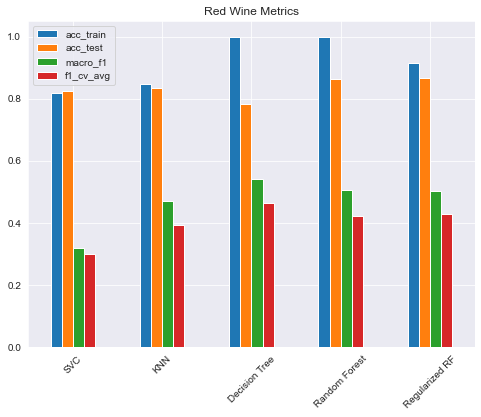

In [143]:
clf_compare.plot(kind='bar',title="Red Wine Metrics", xlabel='', rot=45, figsize=(8,6));

The best performing model to predict red wine quality category is still the regularized random forest as shown the table above having the most appropriate scores compared to the other models.
The reason for this is the tuning of hyperparameters implemented on the random forest which makes the model less prone to errors (with the best estimator that has max_depth=15, max_features=4, min_samples_leaf=4, n_estimators=400, random_state=42)

# Conclusion

- After trying many algorithms we can see that **Regularized Random Forest Classification** performs the best in predicting Wine Quality. 
- The features that can explain the best the quality of both wine are **alcohol**, **density**, **volatile_acidity** and **chlorides**.
- There is a difference in top features that predict the quality of White wine and Red wine. The features explaining the best the quality of White wine are **alcohol**, **density**, **free_sulfur_dioxide**, **volatile_acidity**, while in the case of Red wine they are **alcohol**, **volatile_acidity**, **sulphates** and **total_sulfur_dioxide**. However for both types of wine **alcohol** is always the most important feature. Besides, these features align with what we researched before. 